<img src="img/logoifsc.png">
<link rel="stylesheet" href="arvores_de_decisao.css">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Aprendizado Simbólico: Indução de Árvores de Decisão
    
---

## Conteúdo
- Introdução
- Algoritmo Geral
- Running Example
- Exercícios

## Introduçao

- Árvores de Decisão (AD) são uma das técnicas mais populares de mineração de dados.

- As AD consistem em um conjunto de *nós internos* e *nós folhas* que estão organizados hierárquicamente.

<img src="img/admodelo.jpg">

- Essa estrutura permite organizar o processo de decisão.

- Um exemplo, poderia ser uma árvore de decisão para decidir se ir jogar tênis ou não, baseado em alguns atributos climáticos.

<img src="img/adexemplo.jpg">

- Algumas vantagens das árvores de decisão:
    
    - O conhecimento é explícito e interpretável.

    - O processo de tomada de decisão é, além de entendível, explicável.

    - Podem ser representados por meio de símbolos usando a forma **se/então**, por isso é chamado de modelo simbólico.   


### Principais Algoritmos

- Os algoritmos de indução de classificadores que representam o conhecimento adquirido por meio de uma Árvores de Decisão, pertencem a uma família de algoritmos chamados TDIDT (Top Down Induction of Decision Trees).

- Existe uma literatura extensa sobre algoritmos clássicos e adaptadções de algoritmos, mas alguns dos principais:
    - ID3 (Iterative Dichotomiser 3)
        - Proposto por Quinlan em 1986
        - Suporta atributos discretos e classe também discreta.
    - C4.5
        - Proposto por Quinlan em 1993
        - Suporta atributos discretos e contínuos, e classe discreta.
    - M5
        - Proposto por Quinlan em 1992
        - Suporta atributos discretos e contínuos, e classe numérica
        - Neste caso, chamam-se árvores de regressão

## Algoritmo Geral

- A idéia geral do algoritmo consiste em dividir o conjunto de dados sucessivamente até que todos nós folha sejam puros.

- Método $AD(X)$
<ol class="algorithm">
    <li>Se todos os exemplos em $X$ são da mesma classe cria-se uma nó folha para essa classe;</li>    
    <li>Caso contrário:</li>
    <ol>
        <li>Mede-se a <b>qualidade</b> de todos os atributos;</li>
        <li>Se nenhum atributo consegue melhorar a organização do conjunto $X$ então cria-se um nó folha para a classe <b>mais frequênte</b>;</li>
        <li>Caso contrário:</li>
        <ol>
           <li>Escolhe o <b>melhor atributo</b> $A$ para $X$;</li>
           <li>Cria-se um nó interno de decisão baseado em $A$;</li>
           <li>Divide-se o conjunto de dados de acordo com os valores de $A$ em subconjuntos $X_j$;</li>
           <li>A partir do nó de decisão cria-se uma aresta para cada valor de $A$ e associa-se cada $X_j$ a uma aresta;</li>
           <li>Para cada conjunto $X_j$ executa-se o método $AD(X_j)$;</li>
        </ol>                  
    </ol>    
</ol>

## Running Example

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/playtennis.txt", sep = " ")
df

,Day,Outlook,Temp,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


Removemos a coluna 'Day', já que não representa uma informação relevante para o domínio do problema.

In [3]:
df = df.drop(['Day'], axis = 1, errors = 'ignore')
df

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Método $AD$ para $X$
- Esse conjunto de dados possui exemplos de ambas as classes, então vamos medir a qualidade de seus atributos, usando o ganho de informação.

In [4]:
import helper

In [5]:
classe = 'PlayTennis'
helper.ganho_de_informacao_todos(df, classe)

,InformationGain
Outlook,0.246750
Temp,0.029223
Humidity,0.151836
Wind,0.048127


- Temos atributos que produzem ganho de informação, então escolhemos como melhor atributo, aquele que tem o maior ganho.

- O atributo com maior ganho de informação é o atributo **Outlook**, portanto criamos um nó de decisão para esse atributo. E também um conjunto de dados $X_j$ para cada valor do atributo Outlook: Sunny, Overcast, e Rain.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook.jpg">


In [6]:
df_outlook_overcast = df.query('Outlook == "Overcast"')
df_outlook_sunny = df.query('Outlook == "Sunny"')
df_outlook_rain = df.query('Outlook == "Rain"')

- Observem os subconjuntos de dados

In [7]:
df_outlook_overcast

,Outlook,Temp,Humidity,Wind,PlayTennis
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [8]:
df_outlook_sunny

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [9]:
df_outlook_rain

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


Agora temos que aplicar o mesmo método $AD$ para cada um dos subconjuntos $X_1$, $X_2$ e $X_3$.

Método $AD$ para $X_1$

In [10]:
df_outlook_overcast

,Outlook,Temp,Humidity,Wind,PlayTennis
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


- Como todos os exemplos do conjunto de dados $X_1$ são da mesma classe, criamos então o nó folha com essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_overcast.jpg">


Método $AD$ para $X_2$

In [11]:
df_outlook_rain

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


- Como temos exemplos em $X_2$ de classes diferentes então precisamos medir a qualidade dos atributos para verificar se algum atributo permite melhorar a organização dos dados

In [12]:
helper.ganho_de_informacao_todos(df_outlook_rain, classe)

,InformationGain
Outlook,0.000000
Temp,0.019973
Humidity,0.019973
Wind,0.970951


- O atributo **Wind** apresentou o maior ganho de informação, portanto é o atributo escolhido para fazer um nó de decisão.

- Criamos um conjunto de dados $X_{2,j}$ para cada valor do atributo Wind: Strong e Weak.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_wind.jpg">


In [13]:
df_outlook_rain_wind_strong = df_outlook_rain.query('Wind == "Strong"') # X_{2,1}
df_outlook_rain_wind_weak = df_outlook_rain.query('Wind == "Weak"') # X_{2,1}

- Observamos os conjuntos de dados

In [14]:
df_outlook_rain_wind_strong

,Outlook,Temp,Humidity,Wind,PlayTennis
5,Rain,Cool,Normal,Strong,No
13,Rain,Mild,High,Strong,No


In [15]:
df_outlook_rain_wind_weak

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Temos que aplicar o mesmo método $AD$ para cada um dos subconjuntos $X_{2,1}$ e $X_{2,2}$.

Método $AD$ para $X_{2,1}$

In [16]:
df_outlook_rain_wind_strong

,Outlook,Temp,Humidity,Wind,PlayTennis
5,Rain,Cool,Normal,Strong,No
13,Rain,Mild,High,Strong,No


- Como temos exemplos apenas da classe `PlayTennis = No` criamos um nó folha para essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_wind_strong.jpg">

Método $AD$ para $X_{2,2}$

In [17]:
df_outlook_rain_wind_weak

,Outlook,Temp,Humidity,Wind,PlayTennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


- Este conjunto de dados também possui exemplos de uma classe, `PlayTennis = Yes`, portanto temos que criar um nó folha para essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_wind_weak.jpg">

Método $AD$ para $X_{3}$

In [18]:
df_outlook_sunny

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


- Este conjunto de dados possui exemplos de ambas as classes, então vamos calcular a qualidade dos atributos, para verificar se existe algum atributo que permita organizar melhor os dados.

In [19]:
helper.ganho_de_informacao_todos(df_outlook_sunny, classe)

,InformationGain
Outlook,0.000000
Temp,0.570951
Humidity,0.970951
Wind,0.019973


- Verificamos que o atributo que possui melhor qualidade é **Humidity** e escolhemos ele como o nosso melhor atributo.

- Criamos um nó de decisão para o atributo **Humidity**

- Criamos um conjunto de dados $X_{3,j}$ para cada valor do atributo Humdity: High e Normal.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_humidity.jpg">

In [20]:
df_outlook_sunny_humidity_high = df_outlook_sunny.query('Humidity == "High"') # X_{3,1}
df_outlook_sunny_humidity_normal = df_outlook_sunny.query('Humidity == "Normal"') # X_{3,2}

- Observamos os subconjuntos de dados

In [21]:
df_outlook_sunny_humidity_high

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No


In [22]:
df_outlook_sunny_humidity_normal

,Outlook,Temp,Humidity,Wind,PlayTennis
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


Método $AD$ para $X_{3,1}$

In [23]:
df_outlook_sunny_humidity_high

,Outlook,Temp,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No


- Este conjunto de dados também possui exemplos de uma classe, $PlayTennis = No$, portanto temos que criar um nó folha para essa classe.

- Árvore de Decisão Parcial

<img src="img/adexemplo_outlook_humidity_high.jpg">

Método $AD$ para $X_{3,2}$

In [24]:
df_outlook_sunny_humidity_normal

,Outlook,Temp,Humidity,Wind,PlayTennis
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


- Este conjunto de dados também possui exemplos de uma classe, $PlayTennis = Yes$, portanto temos que criar um nó folha para essa classe.

- Árvore de Decisão Final

<img src="img/adexemplo.jpg">

## Indução de Árvores de Decisão usando Python

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Dividimos o conjunto de dados em `X` e `y`, pois queremos criar uma função $f(X) \rightarrow y$

In [26]:
X = df.drop([classe], axis = 1)
X = pd.get_dummies(X)
y = df[classe]

Ajustamos o modelo aos dados

In [27]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualizamos a árvore de decisão

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(model, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

<Figure size 1200x1000 with 1 Axes>

Mudando o número mínimo de exemplos/instâncias nas folhas da árvore, atributo `min_samples_leaf`.

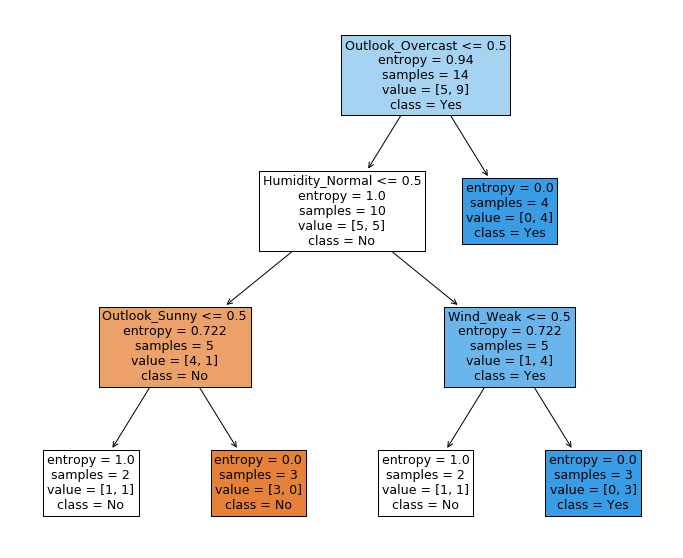

In [29]:
model2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2)
model2.fit(X,y)

plt.figure(figsize=(12,10))
plot_tree(model2, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

Mudando o peso das classes, atributo `class_weight`, com maior peso para a classe `Yes`

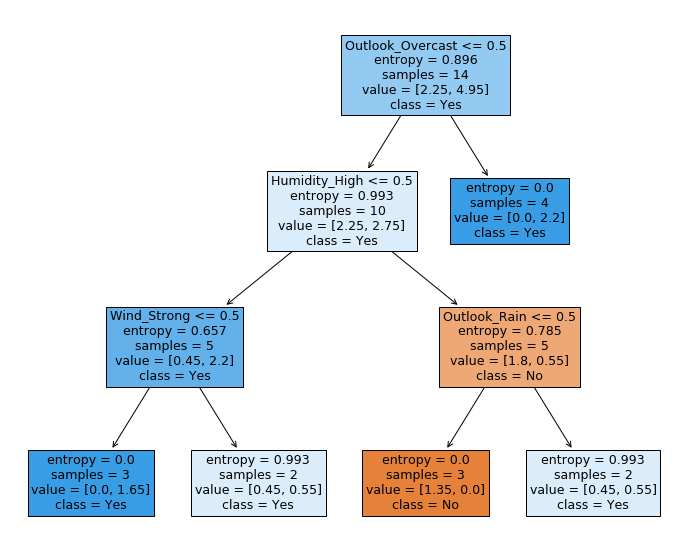

In [30]:
model3 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2, class_weight={'No' : 0.45, 'Yes' : 0.55} )
model3.fit(X,y)

plt.figure(figsize=(12,10))
plot_tree(model3, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

## Árvores de Decisão para Atributos Contínuos e Classe Discreta

### Conjunto de Dados Iris

In [31]:
import seaborn as sns
df_iris = sns.load_dataset("iris")
df_iris.head()                    

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
iris_classe = 'species'
X = df_iris.drop([iris_classe], axis=1)
y = df_iris[iris_classe]

model_iris = DecisionTreeClassifier(criterion="entropy")
model_iris.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualização da árvore de decisão

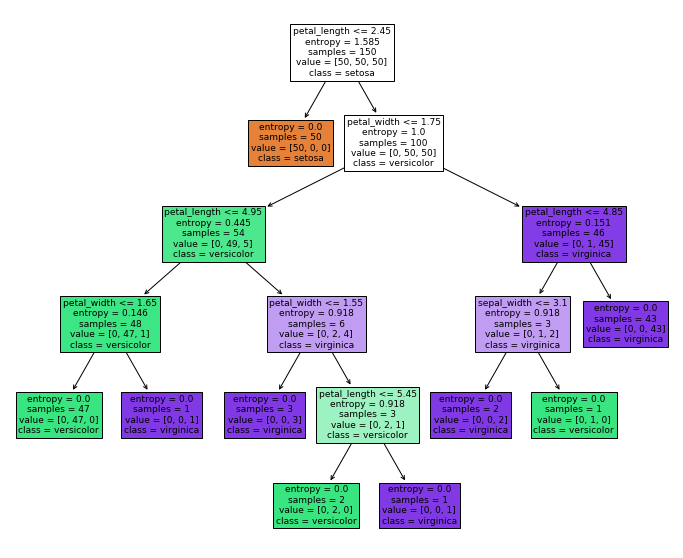

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(model_iris, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

- Podemos observar os atributos numéricos foram separados de forma binária.

- Os subconjuntos de dados $X_j$ correspondem aos exemplos que possuem atributo $A$ maior ou menor do que um valor $x_{sp}$, comumente chamado de *split point*.

- Esse *split point* é encontrado fazendo alguns testes no conjunto de dados.

- Esses testes tem como objetivo dividir o conjunto de dados em duas partes, baseado em um atributo $A$ aqueles que são menores ou iguais do que o *split plont* $x_{sp}$ e aqueles que são maiores do que o *split point*.

- Considere o seguinte conjunto de dados, que é uma amostra de 15 exemplos do dataset *iris*.

In [34]:
df_iris15 = df_iris.sample(15, random_state=1)
df_iris15

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor
141,6.9,3.1,5.1,2.3,virginica
44,5.1,3.8,1.9,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica


- Vamos analisar o atributo `petal_width`

In [35]:
df_iris15a = df_iris15[['petal_width', iris_classe]]
df_iris15a

,petal_width,species
14,0.2,setosa
98,1.1,versicolor
75,1.4,versicolor
16,0.4,setosa
131,2.0,virginica
56,1.6,versicolor
141,2.3,virginica
44,0.4,setosa
29,0.2,setosa
120,2.3,virginica


- Vamos ordenar o conjunto de dados em ordem decrescente do atributo `petal_width` 

In [36]:
df_iris15a.sort_values(by='petal_width')

,petal_width,species
14,0.2,setosa
29,0.2,setosa
16,0.4,setosa
44,0.4,setosa
5,0.4,setosa
98,1.1,versicolor
94,1.3,versicolor
75,1.4,versicolor
51,1.5,versicolor
78,1.5,versicolor


- Vários split points poderiam ser testados, vamos nos deter apenas a analisar aqueles candidatos a maximizar o ganho de informação.

- Os candidatos a split point nesse conjunto de dados são:
    - Entre 0.4 e 1.3, onde o $x_{sp1} = (0.4+1.1)/2 = 0.75$
    - Entre 1.6 e 2.0, onde o $x_{sp2} = (1.6+2.0)/2 = 1.80$    

In [42]:
sp1 = 0.75
sp2 = 1.80
df_iris15a.loc[:,('petal_width <= sp1')] = df_iris15a['petal_width'].apply(lambda x : x <= sp1).values
df_iris15a.loc[:,('petal_width <= sp2')] = df_iris15a['petal_width'].apply(lambda x : x <= sp2).values
df_iris15a

,petal_width,species,petal_width <= sp1,petal_width <= sp2
14,0.2,setosa,True,True
98,1.1,versicolor,False,True
75,1.4,versicolor,False,True
16,0.4,setosa,True,True
131,2.0,virginica,False,False
56,1.6,versicolor,False,True
141,2.3,virginica,False,False
44,0.4,setosa,True,True
29,0.2,setosa,True,True
120,2.3,virginica,False,False


Conjunto de dados ordenado por `petal_width`

In [43]:
df_iris15a.sort_values(by='petal_width')

,petal_width,species,petal_width <= sp1,petal_width <= sp2
14,0.2,setosa,True,True
29,0.2,setosa,True,True
16,0.4,setosa,True,True
44,0.4,setosa,True,True
5,0.4,setosa,True,True
98,1.1,versicolor,False,True
94,1.3,versicolor,False,True
75,1.4,versicolor,False,True
51,1.5,versicolor,False,True
78,1.5,versicolor,False,True


- Calculando o ganho de informação das três divisões:

In [44]:
helper.ganho_de_informacao(df_iris15a, 'petal_width <= sp1', iris_classe)

0.9182958340544896

In [45]:
helper.ganho_de_informacao(df_iris15a, 'petal_width <= sp2', iris_classe)

0.8366407419411672

- Observamos que o maior ganho de informação foi do split point $x_{sp1}$.

- Por isso, esse é o valor do atributo de `petal_width` que dividiu o conjunto em duas partes, maximizando o ganho de informação.

- Outra forma de escrever isso é:

$$ x_{sp} = arg\,max_{value \in A} \; IG(X,A,value) $$

$$ IG(X,A) = IG(X,A,x_{sp})$$

### Algoritmos ID3 e J48

- A complexidade desses algoritmos é da ordem $O(n \times m^2)$, onde $n$ é o número de exemplos e $m$ é o número de atributos.

- Os algoritmos são gulosos (*greedy*), pois a cada iteração eles escolhem um atributo de forma gulosa, baseado numa medida importância de atributos, que só olha para o estado atual do problema.

- O algoritmo não é ótimo, pois não explora todas as possíveis árvores para escolher a melhor.

- O algoritmo é completo, pois sempre contrói uma árvore, nem que seja apenas um nó raiz folha que para a classe majoritária.

### Exercício

- Considere o conjunto de dados Iris de 15 exemplos, usado na aula, e para cada um dos atributos `petal_width`, `petal_length`, `sepal_width` e `septal_length`:
    - Encontre os possíveis candidatos a split point;
    - Calcule o ganho de informação para cada split point;
    - Encontre o split point com maior ganho de informação;
    - Verifique qual atributo apresenta o melhor ganho de informação.